In [44]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
# Load the cleaned dataset
df = pd.read_csv('../data/cleaned_vehicle_data.csv')

In [3]:
# Display dataset information
print("\n Dataset Overview:")
df.info()


 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33345 entries, 0 to 33344
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Vehicle_Model         33345 non-null  object 
 1   Mileage               33345 non-null  int64  
 2   Maintenance_History   33345 non-null  object 
 3   Reported_Issues       33345 non-null  int64  
 4   Vehicle_Age           33345 non-null  int64  
 5   Fuel_Type             33345 non-null  object 
 6   Transmission_Type     33345 non-null  object 
 7   Engine_Size           33345 non-null  int64  
 8   Odometer_Reading      33345 non-null  int64  
 9   Last_Service_Date     33345 non-null  object 
 10  Warranty_Expiry_Date  33345 non-null  object 
 11  Owner_Type            33345 non-null  object 
 12  Insurance_Premium     33345 non-null  int64  
 13  Service_History       33345 non-null  int64  
 14  Accident_History      33345 non-null  int64  
 15 

In [4]:
# Show first few rows
print("\n Preview of Data:")
display(df.head())


 Preview of Data:


,Vehicle_Model,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,...,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance,timestamp,vehicle_id,Tire Pressure (PSI),mileage_per_year
0,Truck,58765,Good,0,4,Petrol,Automatic,2000,28524,2023-11-23,...,3,13.622204,New,New,Weak,1,2025-01-01,1,113.619853,11753.000000
1,Van,60353,Average,1,7,Diesel,Automatic,2500,133630,2023-09-21,...,0,13.625307,New,New,Weak,1,2025-01-02,2,40.386122,7544.125000
2,Bus,68072,Poor,0,2,Petrol,Automatic,1500,34022,2023-06-27,...,0,14.306302,New,Good,Weak,1,2025-01-03,3,98.492053,22690.666667
3,Bus,60849,Average,4,5,Petrol,Automatic,2500,81636,2023-08-24,...,3,18.709467,New,Worn Out,New,1,2025-01-04,4,81.687090,10141.500000
4,Bus,45742,Poor,5,1,Petrol,Manual,2000,97162,2023-05-25,...,2,16.977482,Good,Good,Weak,1,2025-01-05,5,72.728020,22871.000000


In [5]:
# Check for missing values
print("\n Missing Values:")
print(df.isnull().sum())


 Missing Values:
Vehicle_Model           0
Mileage                 0
Maintenance_History     0
Reported_Issues         0
Vehicle_Age             0
Fuel_Type               0
Transmission_Type       0
Engine_Size             0
Odometer_Reading        0
Last_Service_Date       0
Warranty_Expiry_Date    0
Owner_Type              0
Insurance_Premium       0
Service_History         0
Accident_History        0
Fuel_Efficiency         0
Tire_Condition          0
Brake_Condition         0
Battery_Status          0
Need_Maintenance        0
timestamp               0
vehicle_id              0
Tire Pressure (PSI)     0
mileage_per_year        0
dtype: int64


In [6]:
# Summary statistics
print("\n Summary Statistics:")
display(df.describe())


 Summary Statistics:


,Mileage,Reported_Issues,Vehicle_Age,Engine_Size,Odometer_Reading,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Need_Maintenance,vehicle_id,Tire Pressure (PSI),mileage_per_year
count,33345.000000,33345.000000,33345.000000,33345.000000,33345.000000,33345.000000,33345.000000,33345.000000,33345.000000,33345.000000,33345.000000,33345.000000,33345.000000
mean,54964.100555,2.504963,5.505833,1557.798770,75559.333873,17456.841625,5.535103,1.499745,14.969083,0.813585,24961.959064,63.406760,11083.263954
std,14400.528093,1.710370,2.874604,629.558578,43004.456712,7228.745581,2.874344,1.119190,2.883060,0.389447,14439.734974,28.950206,7526.932288
min,30001.000000,0.000000,1.000000,800.000000,1002.000000,5000.000000,1.000000,0.000000,10.000098,0.000000,1.000000,33.090653,2727.727273
25%,42477.000000,1.000000,3.000000,1000.000000,38220.000000,11174.000000,3.000000,0.000000,12.467309,1.000000,12402.000000,35.170888,5970.400000
50%,54837.000000,3.000000,5.000000,1500.000000,75511.000000,17468.000000,6.000000,1.000000,14.945994,1.000000,24944.000000,60.331566,8462.000000
75%,67454.000000,4.000000,8.000000,2000.000000,112949.000000,23694.000000,8.000000,3.000000,17.449654,1.000000,37482.000000,90.078345,13683.600000
max,80000.000000,5.000000,10.000000,2500.000000,149999.000000,30000.000000,10.000000,3.000000,19.999968,1.000000,50000.000000,119.996782,39995.000000


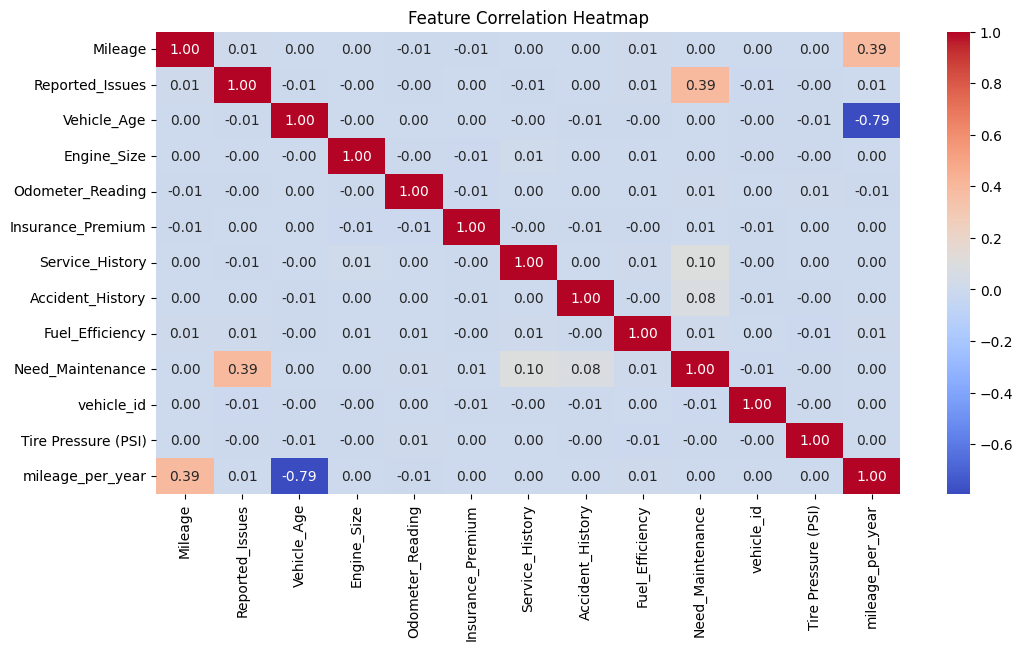

In [7]:
# Correlation heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [8]:
# From the heatmap, we can see that correlation values for most features are low. Let's address the issues.

# Drop irrelevant or weakly correlated features
drop_cols = ['vehicle_id', 'Insurance_Premium', 'Service_History', 'Accident_History', 'Odometer_Reading']
df.drop(columns=drop_cols, inplace=True)

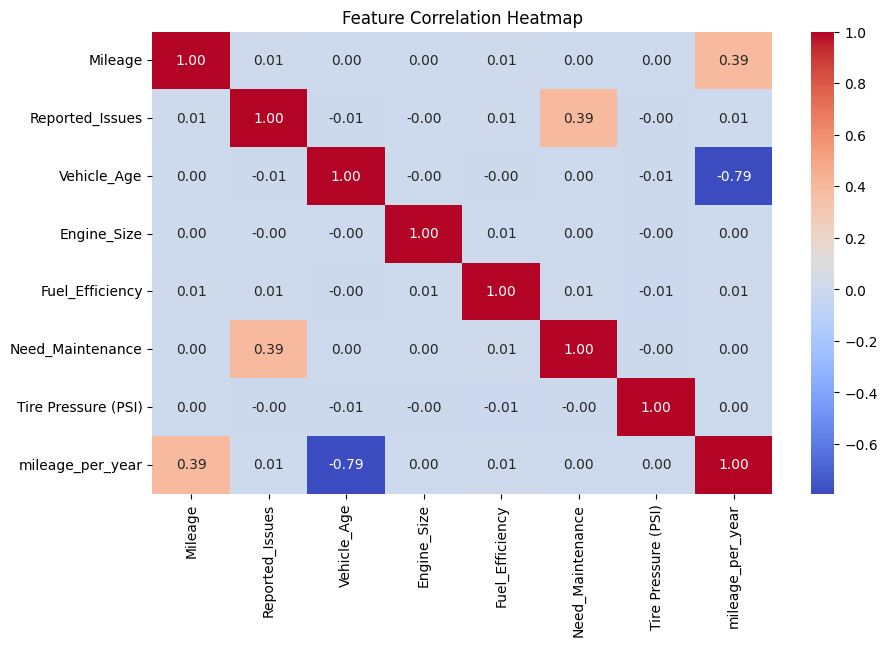

In [9]:
# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [10]:
# Convert categorical features using one-hot encoding
df = pd.get_dummies(df, columns=['Fuel_Type', 'Transmission_Type', 'Maintenance_History'], drop_first=True)

In [11]:
print(df.columns)

Index(['Vehicle_Model', 'Mileage', 'Reported_Issues', 'Vehicle_Age',
       'Engine_Size', 'Last_Service_Date', 'Warranty_Expiry_Date',
       'Owner_Type', 'Fuel_Efficiency', 'Tire_Condition', 'Brake_Condition',
       'Battery_Status', 'Need_Maintenance', 'timestamp',
       'Tire Pressure (PSI)', 'mileage_per_year', 'Fuel_Type_Petrol',
       'Transmission_Type_Manual', 'Maintenance_History_Good',
       'Maintenance_History_Poor'],
      dtype='object')


In [12]:
print(df.head())

  Vehicle_Model  Mileage  Reported_Issues  Vehicle_Age  Engine_Size  \
0         Truck    58765                0            4         2000   
1           Van    60353                1            7         2500   
2           Bus    68072                0            2         1500   
3           Bus    60849                4            5         2500   
4           Bus    45742                5            1         2000   

  Last_Service_Date Warranty_Expiry_Date Owner_Type  Fuel_Efficiency  \
0        2023-11-23           2025-06-24     Second        13.622204   
1        2023-09-21           2025-06-04     Second        13.625307   
2        2023-06-27           2025-04-27      First        14.306302   
3        2023-08-24           2025-11-05     Second        18.709467   
4        2023-05-25           2025-09-14      Third        16.977482   

  Tire_Condition Brake_Condition Battery_Status  Need_Maintenance   timestamp  \
0            New             New           Weak            

In [13]:
# Let's add an Engine Temperature column

# Define realistic temperature ranges per vehicle type (in degree Celsius)
temp_ranges = {
    "Truck": (70, 110),
    "Van": (60, 100),
    "Bus": (75, 115),
    "Car": (65, 105),
}

In [14]:
# Generate random engine temperature based on vehicle type

def generate_temp(vehicle_type):
    return np.random.uniform(*temp_ranges.get(vehicle_type, (65, 105))) # Default range if type is unknown

In [15]:
# Create engine temperature column

df["engine_temperature"] = df["Vehicle_Model"].apply(generate_temp)

In [16]:
# Round values for better readability
df["engine_temperature"] = df["engine_temperature"].round(2)

In [17]:
print(df[["Vehicle_Model", "engine_temperature"]].head())  

  Vehicle_Model  engine_temperature
0         Truck               91.26
1           Van               62.41
2           Bus               88.12
3           Bus               96.00
4           Bus               81.87


In [18]:
df["engine_stress"] = df["engine_temperature"] * df["Mileage"]
print(df[["Vehicle_Model", "engine_temperature", "Mileage", "engine_stress"]].head())  

  Vehicle_Model  engine_temperature  Mileage  engine_stress
0         Truck               91.26    58765     5362893.90
1           Van               62.41    60353     3766630.73
2           Bus               88.12    68072     5998504.64
3           Bus               96.00    60849     5841504.00
4           Bus               81.87    45742     3744897.54


In [19]:
df.to_csv("cleaned_vehicle_data.csv", index=False)

In [20]:
import os

# Check if the file exists in the current directory
print("File exists:", os.path.exists("cleaned_vehicle_data.csv"))

File exists: True


In [21]:
# Display the first few rows of the dataset

print(df.head())

  Vehicle_Model  Mileage  Reported_Issues  Vehicle_Age  Engine_Size  \
0         Truck    58765                0            4         2000   
1           Van    60353                1            7         2500   
2           Bus    68072                0            2         1500   
3           Bus    60849                4            5         2500   
4           Bus    45742                5            1         2000   

  Last_Service_Date Warranty_Expiry_Date Owner_Type  Fuel_Efficiency  \
0        2023-11-23           2025-06-24     Second        13.622204   
1        2023-09-21           2025-06-04     Second        13.625307   
2        2023-06-27           2025-04-27      First        14.306302   
3        2023-08-24           2025-11-05     Second        18.709467   
4        2023-05-25           2025-09-14      Third        16.977482   

  Tire_Condition  ... Need_Maintenance   timestamp  Tire Pressure (PSI)  \
0            New  ...                1  2025-01-01           113.

In [22]:
# Check the data types of each column

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33345 entries, 0 to 33344
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Vehicle_Model             33345 non-null  object 
 1   Mileage                   33345 non-null  int64  
 2   Reported_Issues           33345 non-null  int64  
 3   Vehicle_Age               33345 non-null  int64  
 4   Engine_Size               33345 non-null  int64  
 5   Last_Service_Date         33345 non-null  object 
 6   Warranty_Expiry_Date      33345 non-null  object 
 7   Owner_Type                33345 non-null  object 
 8   Fuel_Efficiency           33345 non-null  float64
 9   Tire_Condition            33345 non-null  object 
 10  Brake_Condition           33345 non-null  object 
 11  Battery_Status            33345 non-null  object 
 12  Need_Maintenance          33345 non-null  int64  
 13  timestamp                 33345 non-null  object 
 14  Tire P

In [23]:
# Get summary statistics for numerical columns

print(df.describe())

            Mileage  Reported_Issues   Vehicle_Age   Engine_Size  \
count  33345.000000     33345.000000  33345.000000  33345.000000   
mean   54964.100555         2.504963      5.505833   1557.798770   
std    14400.528093         1.710370      2.874604    629.558578   
min    30001.000000         0.000000      1.000000    800.000000   
25%    42477.000000         1.000000      3.000000   1000.000000   
50%    54837.000000         3.000000      5.000000   1500.000000   
75%    67454.000000         4.000000      8.000000   2000.000000   
max    80000.000000         5.000000     10.000000   2500.000000   

       Fuel_Efficiency  Need_Maintenance  Tire Pressure (PSI)  \
count     33345.000000      33345.000000         33345.000000   
mean         14.969083          0.813585            63.406760   
std           2.883060          0.389447            28.950206   
min          10.000098          0.000000            33.090653   
25%          12.467309          1.000000            35.170888 

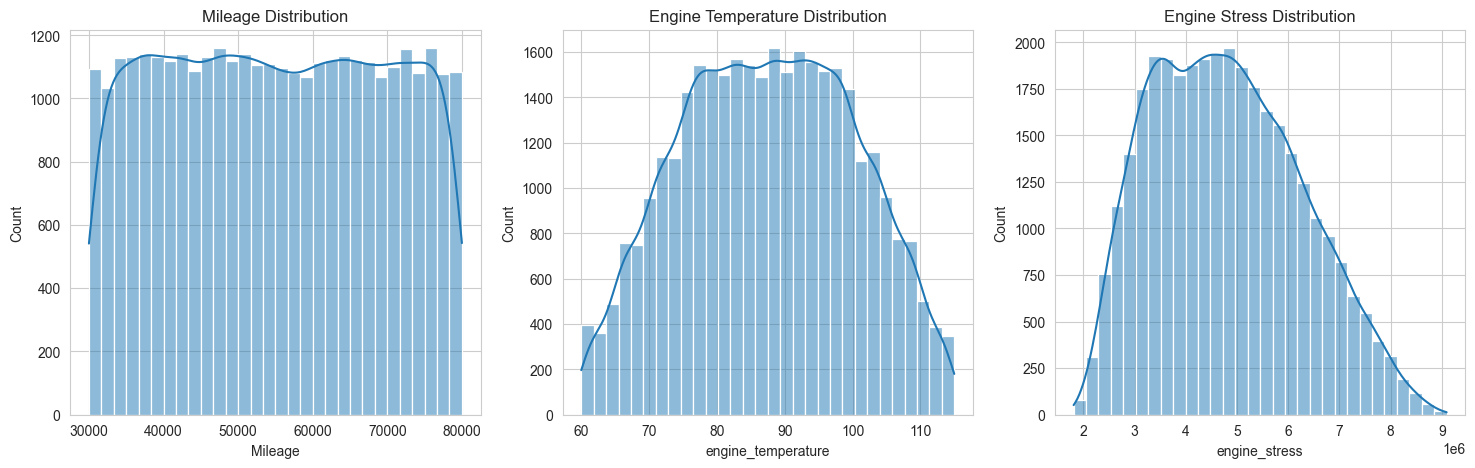

In [24]:
# EDA Visualizations

# Set plot style
sns.set_style("whitegrid")

# Plot distributions of key numerical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df["Mileage"], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Mileage Distribution")

sns.histplot(df["engine_temperature"], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Engine Temperature Distribution")

sns.histplot(df["engine_stress"], bins=30, kde=True, ax=axes[2])
axes[2].set_title("Engine Stress Distribution")

plt.show()

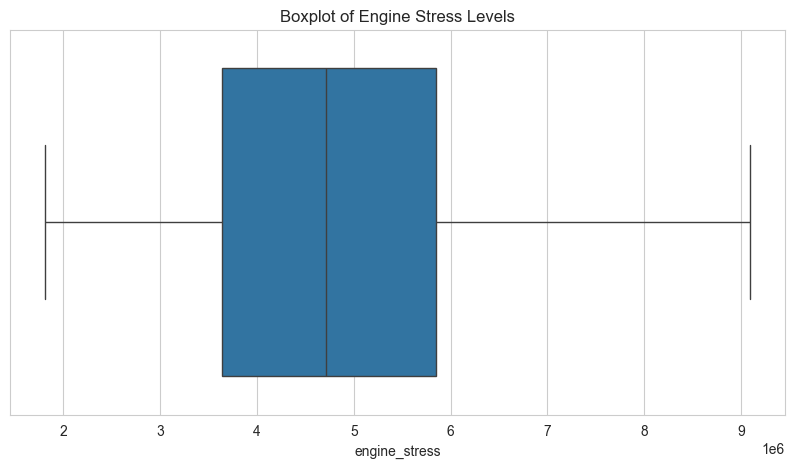

In [25]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["engine_stress"])
plt.title("Boxplot of Engine Stress Levels")
plt.show()

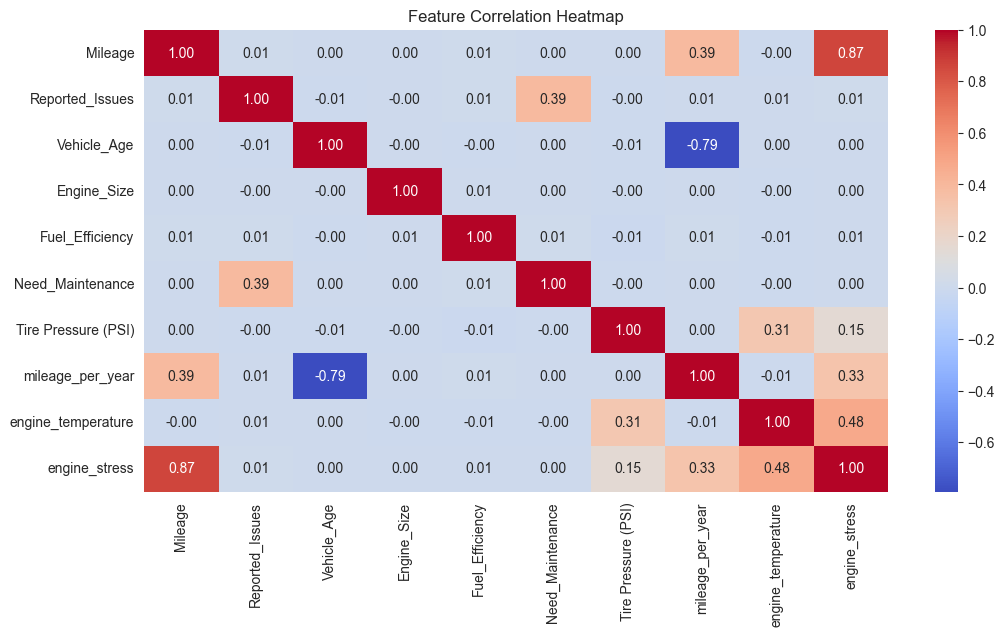

In [26]:
plt.figure(figsize=(12,6))

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [27]:
print(df[["Tire_Condition", "Battery_Status", "Need_Maintenance"]].value_counts())

Tire_Condition  Battery_Status  Need_Maintenance
Good            Weak            1                   3745
New             Weak            1                   3739
Worn Out        Weak            1                   3675
New             Good            1                   2701
                New             1                   2698
Worn Out        Good            1                   2658
                New             1                   2648
Good            New             1                   2640
                Good            1                   2625
Worn Out        Good            0                   1075
New             New             0                   1054
                Good            0                   1047
Worn Out        New             0                   1045
Good            New             0                   1024
                Good            0                    971
Name: count, dtype: int64


In [28]:
df["Tire_Failure"] = df["Tire_Condition"].apply(lambda x: 1 if x in ["Worn Out", "Flat"] else 0)
df["Battery_Failure"] = df["Battery_Status"].apply(lambda x: 1 if x == "Weak" else 0)

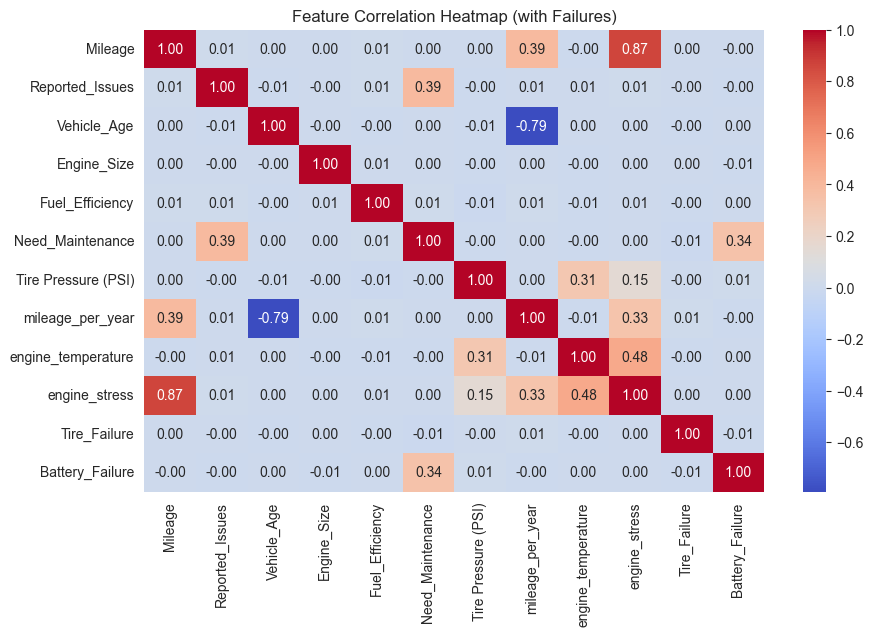

In [29]:
plt.figure(figsize=(10,6))

# Select only numeric columns to avoid errors
numeric_df = df.select_dtypes(include=['number'])

# Compute correlations and plot heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap (with Failures)")
plt.show()

In [30]:
# Tire Health Score (Higher = Better)
df["Tire_Health_Score"] = (df["Tire Pressure (PSI)"] / 100) - (df["Mileage"] / 80000)
df["Tire_Health_Score"] = df["Tire_Health_Score"].round(2)

In [31]:
# Battery Health Score (Higher = Better)
df["Battery_Health_Score"] = (1 - (df["Vehicle_Age"] / df["Vehicle_Age"].max())) + (df["Need_Maintenance"] * -0.3)
df["Battery_Health_Score"] = df["Battery_Health_Score"].round(2)

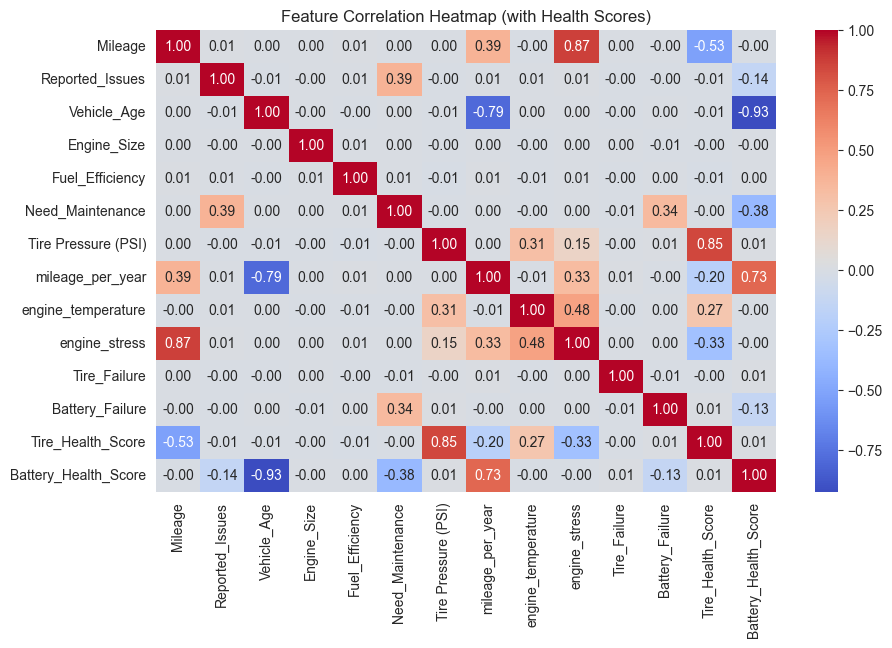

In [32]:
plt.figure(figsize=(10,6))

# Select only numeric columns (ignore categorical columns like 'Vehicle_Model')
numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap (with Health Scores)")
plt.show()

C:\Users\umarm\AppData\Local\Temp\ipykernel_1852\1573095874.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Need_Maintenance', data=df, palette='Set2')


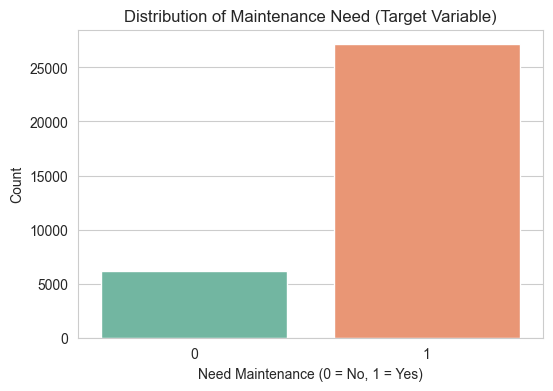

In [36]:
# Countplot for Maintenance Need Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Need_Maintenance', data=df, palette='Set2')
plt.title("Distribution of Maintenance Need (Target Variable)")
plt.xlabel("Need Maintenance (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

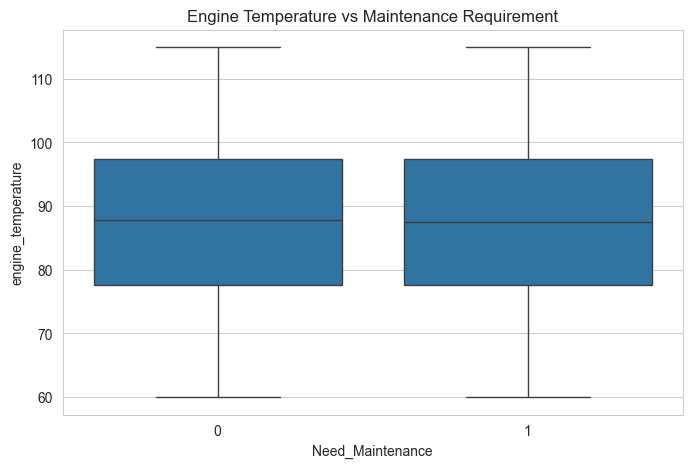

In [39]:
# Visualization
plt.figure(figsize=(8,5))
sns.boxplot(x='Need_Maintenance', y='engine_temperature', data=df)
plt.title("Engine Temperature vs Maintenance Requirement")
plt.show()

In [38]:
# Print all column names in the dataset
print("Available Columns in DataFrame:")
print(df.columns)

Available Columns in DataFrame:
Index(['Vehicle_Model', 'Mileage', 'Reported_Issues', 'Vehicle_Age',
       'Engine_Size', 'Last_Service_Date', 'Warranty_Expiry_Date',
       'Owner_Type', 'Fuel_Efficiency', 'Tire_Condition', 'Brake_Condition',
       'Battery_Status', 'Need_Maintenance', 'timestamp',
       'Tire Pressure (PSI)', 'mileage_per_year', 'Fuel_Type_Petrol',
       'Transmission_Type_Manual', 'Maintenance_History_Good',
       'Maintenance_History_Poor', 'engine_temperature', 'engine_stress',
       'Tire_Failure', 'Battery_Failure', 'Tire_Health_Score',
       'Battery_Health_Score'],
      dtype='object')


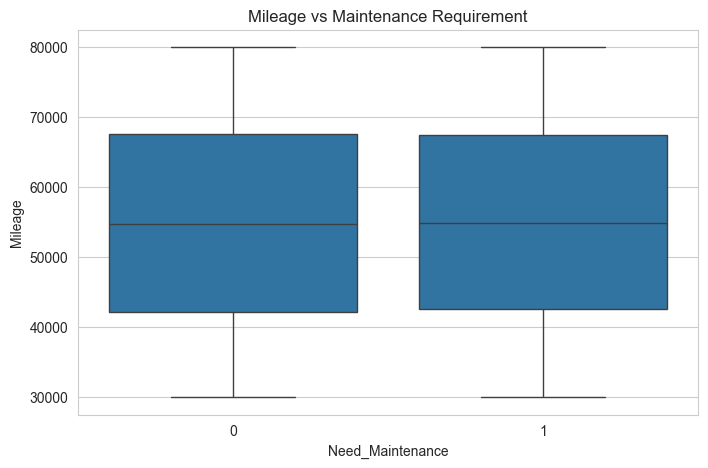

In [40]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Need_Maintenance', y='Mileage', data=df)
plt.title("Mileage vs Maintenance Requirement")
plt.show()

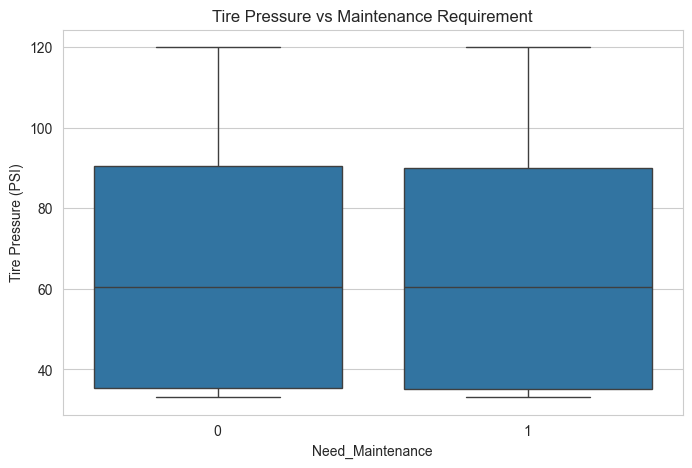

In [41]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Need_Maintenance', y='Tire Pressure (PSI)', data=df)
plt.title("Tire Pressure vs Maintenance Requirement")
plt.show()

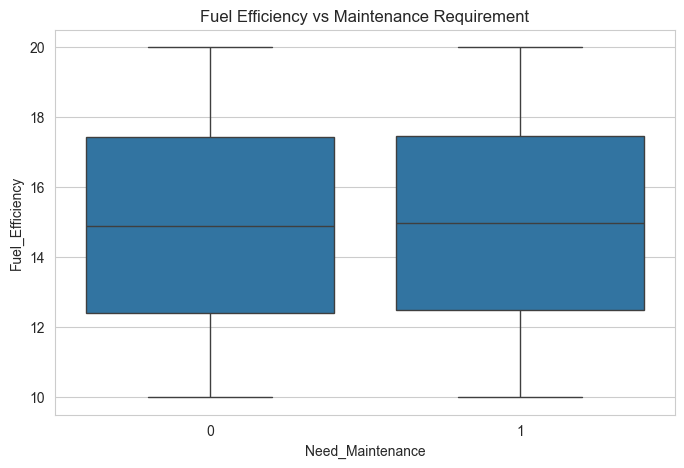

In [42]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Need_Maintenance', y='Fuel_Efficiency', data=df)
plt.title("Fuel Efficiency vs Maintenance Requirement")
plt.show()


In [43]:
# No strong correlation between individual features, more feature engineering is required

# Feature Engineering
df['engine_stress'] = df['engine_temperature'] * df['Mileage']
df['tire_wear'] = df['Tire Pressure (PSI)'] / (df['Vehicle_Age'] + 1)
df['efficiency_drop'] = df['Fuel_Efficiency'] / df['Mileage']

# Display dataset info to verify changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33345 entries, 0 to 33344
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Vehicle_Model             33345 non-null  object 
 1   Mileage                   33345 non-null  int64  
 2   Reported_Issues           33345 non-null  int64  
 3   Vehicle_Age               33345 non-null  int64  
 4   Engine_Size               33345 non-null  int64  
 5   Last_Service_Date         33345 non-null  object 
 6   Warranty_Expiry_Date      33345 non-null  object 
 7   Owner_Type                33345 non-null  object 
 8   Fuel_Efficiency           33345 non-null  float64
 9   Tire_Condition            33345 non-null  object 
 10  Brake_Condition           33345 non-null  object 
 11  Battery_Status            33345 non-null  object 
 12  Need_Maintenance          33345 non-null  int64  
 13  timestamp                 33345 non-null  object 
 14  Tire P

In [46]:
# Select features & target
features = df.drop(columns=['Need_Maintenance'])
target = df['Need_Maintenance']

In [47]:
# Convert categorical columns to numeric
features = pd.get_dummies(features, drop_first=True)

In [48]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a basic Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

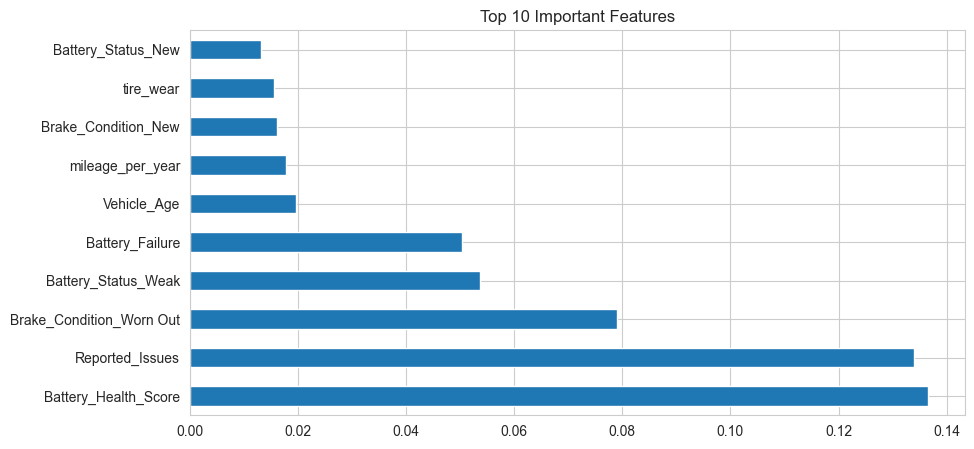

In [49]:
# Feature importance visualization
importances = pd.Series(rf.feature_importances_, index=features.columns)
importances.nlargest(10).plot(kind='barh', figsize=(10,5), title="Top 10 Important Features")
plt.show()

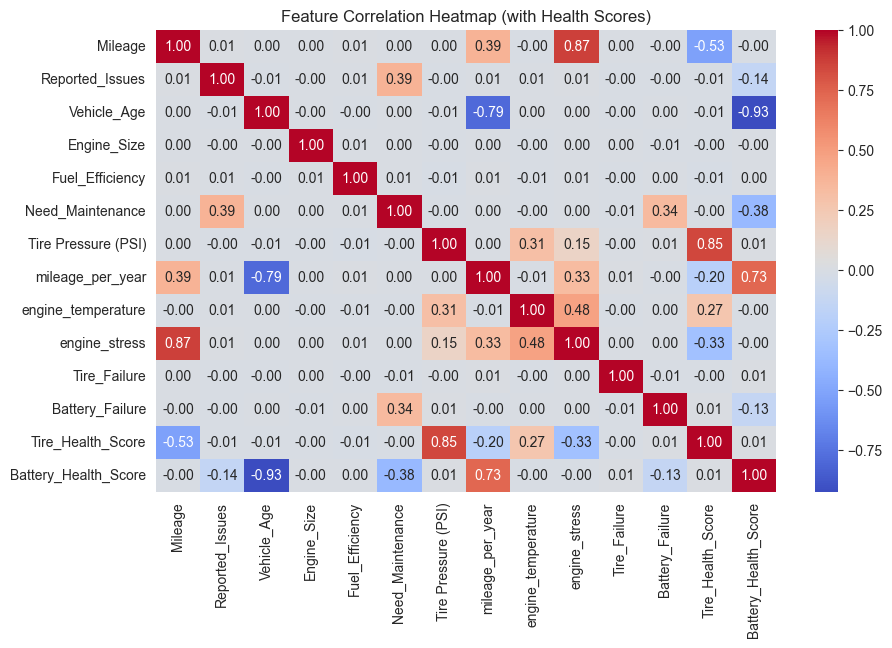

In [50]:
# Heatmap
plt.figure(figsize=(10,6))

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap (with Health Scores)")
plt.show()

In [51]:
# Select top features based on importance & correlation
selected_features = [
    'Battery_Health_Score', 'Reported_Issues', 'Brake_Condition_Worn Out',
    'Battery_Status_Weak', 'Battery_Failure', 'Tire_Health_Score', 'engine_stress'
]

# Prepare final dataset
df_final = df[selected_features + ['Need_Maintenance']]

# Save final dataset for model training
df_final.to_csv("../data/final_training_data.csv", index=False)

# Display final dataset structure
df_final.info()

KeyError: "['Brake_Condition_Worn Out', 'Battery_Status_Weak'] not in index"

In [52]:
print(df.columns)  

Index(['Vehicle_Model', 'Mileage', 'Reported_Issues', 'Vehicle_Age',
       'Engine_Size', 'Last_Service_Date', 'Warranty_Expiry_Date',
       'Owner_Type', 'Fuel_Efficiency', 'Tire_Condition', 'Brake_Condition',
       'Battery_Status', 'Need_Maintenance', 'timestamp',
       'Tire Pressure (PSI)', 'mileage_per_year', 'Fuel_Type_Petrol',
       'Transmission_Type_Manual', 'Maintenance_History_Good',
       'Maintenance_History_Poor', 'engine_temperature', 'engine_stress',
       'Tire_Failure', 'Battery_Failure', 'Tire_Health_Score',
       'Battery_Health_Score', 'tire_wear', 'efficiency_drop'],
      dtype='object')


In [53]:
# Convert categorical variables into one-hot encoded format
df = pd.get_dummies(df, columns=['Brake_Condition', 'Battery_Status'], drop_first=True)

# Display new column names to confirm changes
print(df.columns)

Index(['Vehicle_Model', 'Mileage', 'Reported_Issues', 'Vehicle_Age',
       'Engine_Size', 'Last_Service_Date', 'Warranty_Expiry_Date',
       'Owner_Type', 'Fuel_Efficiency', 'Tire_Condition', 'Need_Maintenance',
       'timestamp', 'Tire Pressure (PSI)', 'mileage_per_year',
       'Fuel_Type_Petrol', 'Transmission_Type_Manual',
       'Maintenance_History_Good', 'Maintenance_History_Poor',
       'engine_temperature', 'engine_stress', 'Tire_Failure',
       'Battery_Failure', 'Tire_Health_Score', 'Battery_Health_Score',
       'tire_wear', 'efficiency_drop', 'Brake_Condition_New',
       'Brake_Condition_Worn Out', 'Battery_Status_New',
       'Battery_Status_Weak'],
      dtype='object')


In [55]:
selected_features = [
    'Battery_Health_Score', 'Reported_Issues', 'Brake_Condition_Worn Out',
    'Battery_Failure', 'Tire_Health_Score', 'engine_stress', 'Battery_Status_Weak'
]

# Ensure the columns exist in df
selected_features = [feature for feature in selected_features if feature in df.columns]

# Prepare final dataset
df_final = df[selected_features + ['Need_Maintenance']]

# Save final dataset for model training
df_final.to_csv("../data/final_training_data.csv", index=False)

# Display final dataset structure
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33345 entries, 0 to 33344
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Battery_Health_Score      33345 non-null  float64
 1   Reported_Issues           33345 non-null  int64  
 2   Brake_Condition_Worn Out  33345 non-null  bool   
 3   Battery_Failure           33345 non-null  int64  
 4   Tire_Health_Score         33345 non-null  float64
 5   engine_stress             33345 non-null  float64
 6   Battery_Status_Weak       33345 non-null  bool   
 7   Need_Maintenance          33345 non-null  int64  
dtypes: bool(2), float64(3), int64(3)
memory usage: 1.6 MB
